
Training custom LSTM model...
Epoch 0, Loss: 0.008391624253099136
Epoch 10, Loss: 0.007321735339238123
Epoch 20, Loss: 0.007316913744422328
Epoch 30, Loss: 0.007311787361025419
Epoch 40, Loss: 0.007306157045567245
Epoch 50, Loss: 0.007299812306766322
Epoch 60, Loss: 0.007292524891072749
Epoch 70, Loss: 0.007284042797125253
Epoch 80, Loss: 0.007274084789290902
Epoch 90, Loss: 0.007262335608191017
Test MSE: 0.008257567658615789


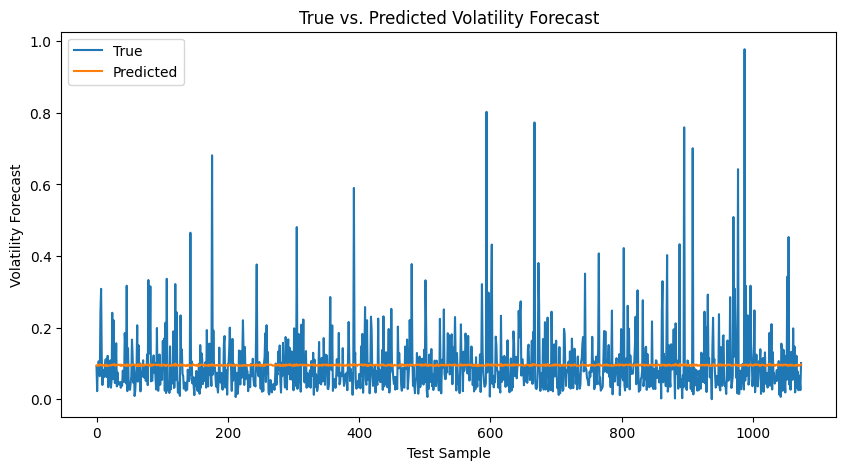

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf  

from LSTM_model import LSTM

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

file_path = '../../data/dataS.csv'
df = pd.read_csv(file_path, parse_dates=['Date'])

# df = df.dropna()
# df = df[df['volatility_forcast'] <= 0.2]
# df = df[df['volatility'] <= 0.15]

df.head()

target = 'volatility_forcast'
date = 'Date'

df = df.drop(columns=[date])
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

train_sequence = [X_train_scaled[i] for i in range(X_train_scaled.shape[0])]
train_targets = [y_train_scaled[i, 0] for i in range(y_train_scaled.shape[0])]

input_size = X_train.shape[1]   
hidden_size = 50 
output_size = 1  

model = LSTM(input_size, hidden_size, output_size)

epochs = 100
learning_rate = 0.001
print("Training custom LSTM model...")
model.train(train_sequence, train_targets, learning_rate=learning_rate, epochs=epochs)


test_sequence = [X_test_scaled[i] for i in range(X_test_scaled.shape[0])]
predictions = []
for x in test_sequence:
    y_pred, _, _ = model.forward([x])
    output_array = y_pred[0]
    predictions.append(output_array.flatten()[0])

predictions = np.array(predictions).reshape(-1, 1)

predictions_inv = scaler_y.inverse_transform(predictions)
y_test_inv = scaler_y.inverse_transform(y_test_scaled)

mse = mean_squared_error(y_test_inv, predictions_inv)
print(f"Test MSE: {mse}")


plt.figure(figsize=(10, 5))
plt.plot(y_test_inv, label='True')
plt.plot(predictions_inv, label='Predicted')
plt.title("True vs. Predicted Volatility Forecast")
plt.xlabel("Test Sample")
plt.ylabel("Volatility Forecast")
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from LSTM_model import LSTM

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [ ]:
file_path = '../../data/dataS.csv'
df = pd.read_csv(file_path, parse_dates=['Date'])
#df = df.dropna()
#df = df[df['volatility_forcast'] <= 0.2]
#df = df[df['volatility'] <= 0.15]

df.head()

,Date,Open,High,Low,Close,SP500_Adj_Close,move,Volume,volatility,volatility_forcast,returns,GARCH_VM
0,2003-01-03,0.0477,0.0030,0.0015,0.0005,0.0482,1,0.0698,0.0668,0.2115,0.5843,0.0472
1,2003-01-06,0.0476,0.0014,0.0027,0.0049,0.0525,0,0.0973,0.2115,0.0912,0.6219,0.0377
2,2003-01-07,0.0518,0.0030,0.0009,0.0006,0.0512,0,0.1071,0.0912,0.1286,0.5742,0.0319
3,2003-01-08,0.0505,0.0033,0.0002,0.0020,0.0485,1,0.1001,0.1286,0.1648,0.5617,0.0256
4,2003-01-09,0.0478,0.0005,0.0028,0.0044,0.0522,0,0.1085,0.1648,0.1331,0.6169,0.0212


In [ ]:
target = 'volatility_forcast'
date='Date'

df=df.drop(columns=[date])
X = df.drop(columns=[target])
y = df[target]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)